# ML Assignment 4: Linear Regression(SGD)
# Nilesh Sonune | 16D070004



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import random

c:\users\nilesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)




---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 

---



In [2]:
housing_data = california_housing.fetch_california_housing()

In [3]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [4]:
df = df[df.Target < 5]

In [5]:
X = df.MedInc
y = df.Target

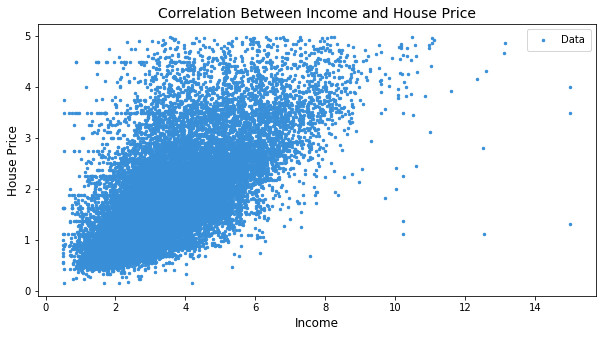

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [7]:
a= np.array([1,2,3])
np.random.choice(a, 2)

array([3, 2])

In [8]:
indices = np.arange(0, len(X))
batch = np.random.choice(indices, 3)
batch

array([ 5672, 15704,   379])

In [9]:
def SGD(X, y, lr = 0.01, epochs=100, batch_size = 1):
    # Initialize parameters and loss
    m, b = 1, 1 
    mse = []
    
    X = np.array(X)
    y = np.array(y)
    indices = np.arange(0, len(X))
    
    # Iterate for given epochs
    for _ in range(epochs):
        # choosing the batch and calculating error
        batch_indices = np.random.choice(indices, batch_size)
        X_sample = X[batch_indices]
        y_sample = y[batch_indices]
        error = y_sample - (m*X_sample + b)
        
        # Update the parameters
        m = m - (lr*(-2*np.sum(np.dot(X_sample, error))))/batch_size
        b = b - (lr*(-2*np.sum(error)))/batch_size
        mse.append(mean_squared_error(y, m*X + b))
        
    return m, b, mse

In [10]:
m, b, mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.5617577074100414


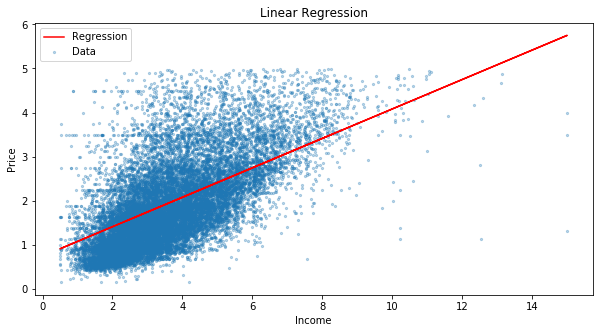

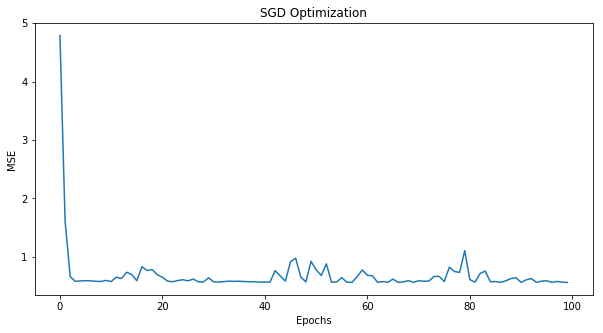

In [11]:
y_pred = m*X + b

print("MSE: {}".format(mean_squared_error(y, y_pred)))
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', s=5, alpha=0.3)
plt.plot(X, y_pred, label='Regression', c='red')
plt.xlabel('Income')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

# SVM

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [13]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
    x, y = point
    if 0.5*x - y + 0.25 > 0:
        data[i].append(-1)
    else:
        data[i].append(1)



---


**Visualizing the above data**


---



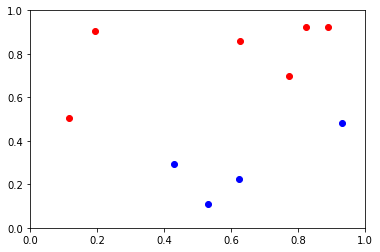

In [14]:
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
    plt.xlim(0,1)
    plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [15]:
def svm_function(X, Y, epoch, l_rate):
    X=np.append(X, np.ones((len(X),1)), axis=1)
    
    w = np.zeros(np.shape(X)[1])
    
    for t in range(1, epoch+1):
        i_t = np.random.randint(0,len(X))
        n_t = 1/(l_rate*t)
        
        if Y[i_t]*np.dot(w, X[i_t]) < 1:
            w = (1 - n_t*l_rate)*w + n_t*Y[i_t]*X[i_t]
        else:
            w = (1 - n_t*l_rate)*w
    
    w = min(1, (1/np.sqrt(l_rate))/np.linalg.norm(w))*w

    return w



---


**Run SVM Classifier**


---



In [16]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 0.01)
w

array([-2.30457937,  4.36971515, -0.94      ])

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



In [17]:
def visualize_svm(data, w, line_Llim = 0, line_Ulim = 1):
    x = np.linspace(line_Llim, line_Ulim, 10000)
    y = 0.5*x + 0.25
    y_w = (-w[0]/w[1]) * x - (w[2]/w[1])

    for x1, x2, l in data:
        if l == 1: 
            clr = 'red'
        else: 
            clr = 'blue'
        plt.scatter(x1, x2, c=clr) 

    plt.plot(x, y, 'k')  
    plt.plot(x, y_w, 'm--')
    plt.legend(["Actual Line","Predicted Line using 'w' "])

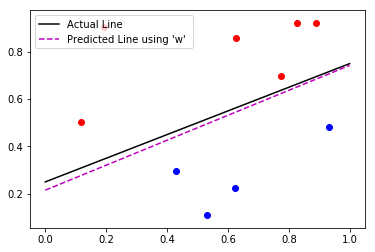

In [18]:
visualize_svm(data, w)
# NOTE = we can see that the SVM fits appropriately for the given data 
# such that it leaves equal margin on classes from both sides